In [2]:
import pandas as pd

movies_model =  pd.read_csv("movies_eda.csv")

Model: Logistic Regression
Accuracy: 0.9385416666666667
Confusion Matrix:
 [[434   7]
 [ 52 467]]
Classification Report:
               precision    recall  f1-score   support

       False       0.89      0.98      0.94       441
        True       0.99      0.90      0.94       519

    accuracy                           0.94       960
   macro avg       0.94      0.94      0.94       960
weighted avg       0.94      0.94      0.94       960

------------------------------------------------------------
Model: Decision Tree
Accuracy: 0.9854166666666667
Confusion Matrix:
 [[432   9]
 [  5 514]]
Classification Report:
               precision    recall  f1-score   support

       False       0.99      0.98      0.98       441
        True       0.98      0.99      0.99       519

    accuracy                           0.99       960
   macro avg       0.99      0.98      0.99       960
weighted avg       0.99      0.99      0.99       960

-----------------------------------------------

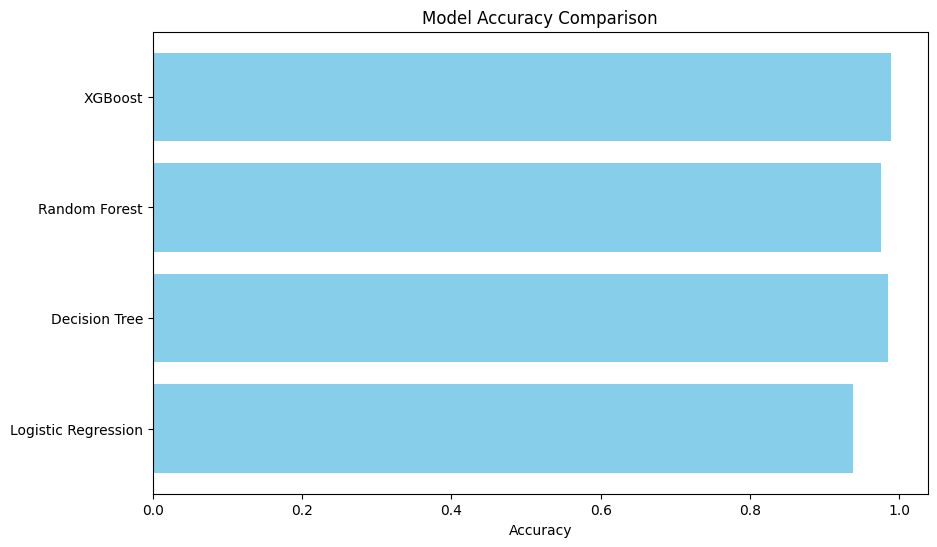

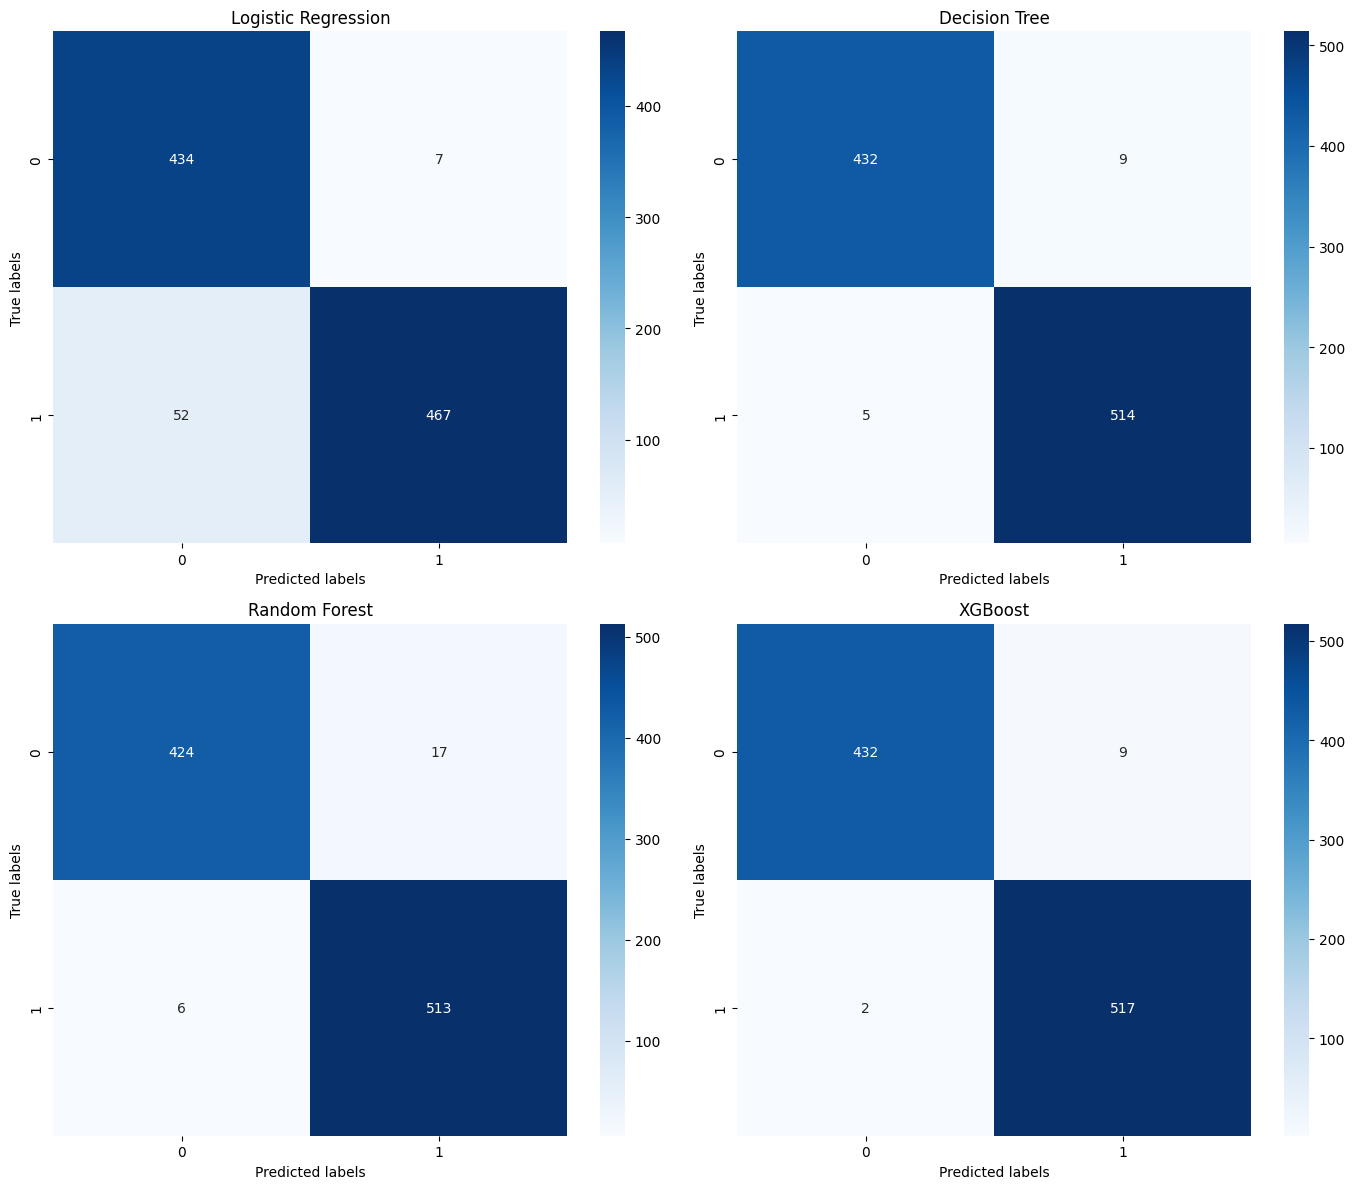

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Feature selection
feature_cols = ['budget', 'revenue', 'runtime', 'vote_average', 'vote_count']
# Preparing data
X = movies_model[feature_cols]
y = movies_model['is_profitable']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dictionary of models for easy iteration
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

model_accuracies = {}
model_confusion_matrices = {}

# Training and evaluating each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[name] = accuracy
    model_confusion_matrices[name] = confusion_matrix(y_test, y_pred)

    print(f"Model: {name}")
    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", model_confusion_matrices[name])
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("-" * 60)

# Plotting model accuracies for comparison
plt.figure(figsize=(10, 6))
plt.barh(list(model_accuracies.keys()), list(
    model_accuracies.values()), color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

# Plotting confusion matrices for models
fig, axs = plt.subplots(2, 2, figsize=(14, 12))
axs = axs.flatten()

for i, (name, matrix) in enumerate(model_confusion_matrices.items()):
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', ax=axs[i])
    axs[i].set_title(name)
    axs[i].set_xlabel('Predicted labels')
    axs[i].set_ylabel('True labels')

plt.tight_layout()
plt.show()